In [1]:
from pathlib import Path
from datetime import datetime

#Run ID to be used for naming output files
RUN_ID = datetime.now().strftime("%Y%m%d")
RUNID_DASH = datetime.now().strftime("%Y-%m-%d")

RUN_ID = "20250827"
RUNID_DASH = "2025-08-27"


#Define paths for current project
# --- Centralized paths ---
ROOT = Path("..")
DATA = ROOT / "data"
LOGS = ROOT / "logs"
SCRIPTS = ROOT / "scripts"
RESULTS = ROOT / "results"
ALIGN_DIR = RESULTS / "align"
TREE_DIR = RESULTS / "trees"
FIGURES = RESULTS / "figures"

# --- Key files ---
GR_FASTA = DATA / "GR.fasta" #Starting file for BLAST search 
BLAST_OUT = DATA / "BAC88139.1_top150_uniref90.fasta"
RENAMED_FASTA = DATA / "BAC88139.1_top150_uniref90.rename.fasta"

CULLED_FASTA = DATA / f"BAC88139.1_top150_uniref90.rename.culled_{RUN_ID}.fasta"
DISCARDED_FASTA = DATA / f"BAC88139.1_top150_uniref90.rename.discarded_{RUN_ID}.fasta"
SUMMARY_CSV = LOGS / f"GR_max_similarity_{RUN_ID}.csv"

# --- Alignment and tree output ---
ALIGN_DIR.mkdir(parents=True, exist_ok=True)
TREE_DIR.mkdir(parents=True, exist_ok=True)
ALN_FASTA = ALIGN_DIR / f"BAC88139.1_top150_uniref90.rename.culled_{RUN_ID}_ALN.faa"
IQ_PREFIX = TREE_DIR / f"BAC88139.1_top150_uniref90.rename.culled_{RUN_ID}_ML_{RUNID_DASH}"

#Uniref analysis on knot to find diverse rhodopsins
ALL_UNIREF_HITS = DATA / "All_uniref50_hits.fa"  # Concatenated microbial rhodopsin hits from knot analysis




Lowest 20 λmax predictions:
                                   Names  Single_Prediction
          Br__Haloquadratum__UR50_Q18DH5              485.9
    Br__Halobacteriales__UR50_A0A2R6JL35              488.3
        Br__Halorutilus__UR50_A0A9Q4C3E6              492.7
 Pr__Verrucomicrobiales__UR50_A0A2E2HQ20              492.8
        Cyr__Halapricum__UR50_A0A897NL32              493.5
     Pr__Pseudomonadota__UR50_A0A5J6N178              495.8
                   Pr__root__UR50_Q9AFF7              495.9
        Cyhr__Haloferacales__UR50_U1P7Y5              496.7
        Cyhr__Halohasta__UR50_A0A1H6WB68              497.3
         Cyhr__Halobacteria__UR50_P42196              499.3
     Cyhr__Halobacteria__UR50_A0A125T1B2              499.6
Pr__Alphaproteobacteria__UR50_A0A2S6S8D0              501.7
               Pr__root__UR50_A0A2D9XFY8              501.7
     Cyhr__Halobacteria__UR50_A0A6G3ZG40              502.2
       Pr__unclassified__UR50_A0A8J2AJK3              502.5
          B

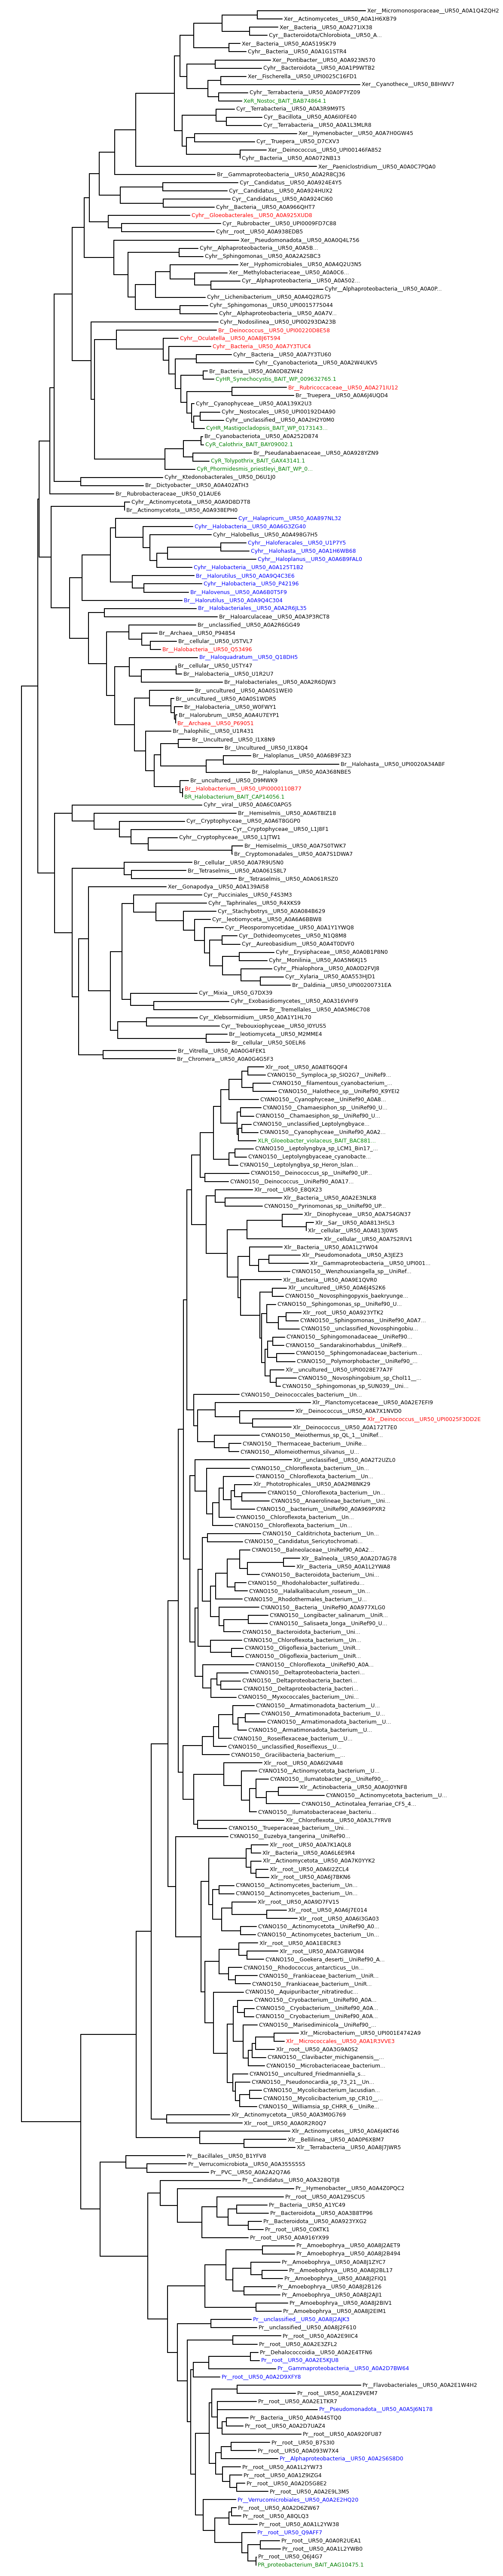

In [2]:
import sys
sys.path.append(str(SCRIPTS))
from plot_tree import plot_tree

# Path to your specific treefile
tree_file = TREE_DIR / f"combined_deduped_{RUN_ID}_ML_{RUNID_DASH}.treefile"
fig_path = FIGURES / f"combined_deduped_{RUN_ID}_tree.pdf"

plot_tree(
    tree_file,
    save_path=fig_path,
    figsize=(12, 60),
    optics_tsv="../results/optics/optics_on_optics_predictions_2025-08-28_22-04-07/optics_predictions_predictions.tsv",
    n=20
)

In [3]:
from Bio import Phylo

treefile = "../results/trees/combined_deduped_20250827_ML_2025-08-27.treefile"
tree = Phylo.read(treefile, "newick")

# Get all tip names
tip_names = [clade.name for clade in tree.get_terminals()]

# Check for the gene
gene = "Br__Haloquadratum__UR50_Q18DH5"
print(gene in tip_names)

# Optionally, print similar names if not found
if gene not in tip_names:
    print("Closest matches:")
    for name in tip_names:
        if "Haloquadratum" in name or "Q18DH5" in name:
            print(name)

True
